Jupyter kernel session started automatically.


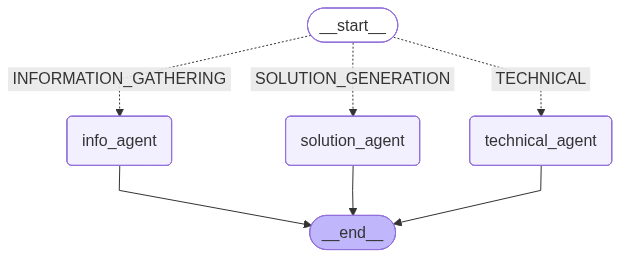

In [13]:
from costix.graph import CostixGraph
from langgraph.checkpoint.memory import MemorySaver
checkpoint=MemorySaver()

from IPython.display import display,Image

graph=CostixGraph(checkpointer=checkpoint)


display(Image(graph.graph.get_graph(xray=0).draw_mermaid_png()))


In [9]:
thread_id='2'
config={'configurable':{'thread_id':thread_id}}


In [10]:
import json
graph.graph.get_state(config).values

{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='2c6fa7b1-9833-4421-8346-d8171e877712'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2oybMmzrlQIhcmTGoYEOq793', 'function': {'arguments': '{"question":{"title":"What type of cloud project are you planning?","subtitle":"Please select the primary type or purpose of your cloud project to help us start gathering relevant requirements.","type":"single_select","options":["Migration of existing systems to cloud","New application development on cloud","Hybrid cloud setup","Disaster recovery/Backup","Big Data/Analytics","Machine Learning/AI workloads","DevOps/CI-CD Pipelines","Other (please specify)"]}}', 'name': 'ask_question'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 667, 'total_tokens': 768, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected

In [11]:
# initialize the graph state

from langchain_core.messages import HumanMessage
from costix.schemas import CostixPhase

graph.initialize_thread(thread_id=thread_id)


In [12]:


user_input=input('Enter your message')



user_message=HumanMessage(content=user_input)
response=graph.invoke({'messages':[user_message]},config,debug=True)

ai_message=response['messages'][-1]
print('Ai Response:',ai_message.content)





[values] {'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='2c6fa7b1-9833-4421-8346-d8171e877712'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2oybMmzrlQIhcmTGoYEOq793', 'function': {'arguments': '{"question":{"title":"What type of cloud project are you planning?","subtitle":"Please select the primary type or purpose of your cloud project to help us start gathering relevant requirements.","type":"single_select","options":["Migration of existing systems to cloud","New application development on cloud","Hybrid cloud setup","Disaster recovery/Backup","Big Data/Analytics","Machine Learning/AI workloads","DevOps/CI-CD Pipelines","Other (please specify)"]}}', 'name': 'ask_question'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 667, 'total_tokens': 768, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'r

In [6]:
response

{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='2c6fa7b1-9833-4421-8346-d8171e877712'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2oybMmzrlQIhcmTGoYEOq793', 'function': {'arguments': '{"question":{"title":"What type of cloud project are you planning?","subtitle":"Please select the primary type or purpose of your cloud project to help us start gathering relevant requirements.","type":"single_select","options":["Migration of existing systems to cloud","New application development on cloud","Hybrid cloud setup","Disaster recovery/Backup","Big Data/Analytics","Machine Learning/AI workloads","DevOps/CI-CD Pipelines","Other (please specify)"]}}', 'name': 'ask_question'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 667, 'total_tokens': 768, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected

In [7]:
from costix.agents import get_info_agent

from costix.model import get_model



info_agent=get_info_agent(get_model())

In [8]:
from langgraph.prebuilt import create_react_agent

